🎯 AUC obtenido: 0.6978


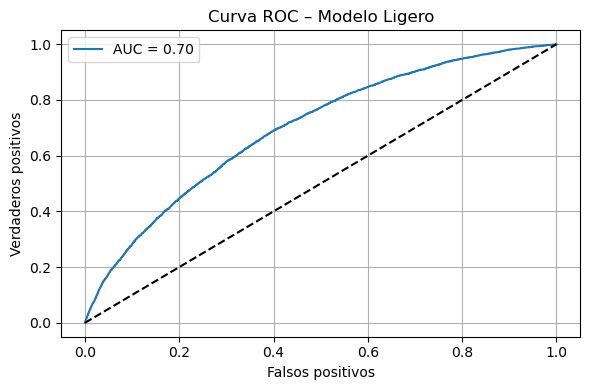

✅ Modelo guardado como 'modelo_hist_gradient_boosting.pkl'


In [4]:
# =============================================================
# 🧠 Entrenamiento modelo HistGradientBoosting (ligero)
# =============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# ----------------------------------------
# 📦 1. Cargar datos reducidos
# ----------------------------------------
df = pd.read_csv("../data/processed/df_reducido.csv")

# Reducir categorías
def reducir_empleo(e):
    if e in ["Driver", "Sales", "Supervisor"]:
        return "BASICO"
    elif e in ["Manager", "Registered Nurse", "Teacher"]:
        return "PROFESIONAL"
    elif e == "Owner":
        return "AUTONOMO"
    else:
        return "OTRO"

def reducir_finalidad(f):
    if f == "debt_consolidation":
        return "consolidacion"
    elif f == "credit_card":
        return "credito"
    elif f == "home_improvement":
        return "hogar"
    elif f == "small_business":
        return "negocio"
    else:
        return "otros"

df["empleo_reducido"] = df["empleo"].apply(reducir_empleo)
df["finalidad_reducida"] = df["finalidad"].apply(reducir_finalidad)

# ----------------------------------------
# 🎯 2. Variables finales
# ----------------------------------------
features = [
    "ingresos", "principal", "num_cuotas", "antiguedad_empleo",
    "rating_ord", "dti", "empleo_reducido", "finalidad_reducida"
]
X = df[features]
y = df["target"]

# ----------------------------------------
# 🔄 3. Preprocesamiento + modelo
# ----------------------------------------
num_vars = ["ingresos", "principal", "num_cuotas", "antiguedad_empleo", "rating_ord", "dti"] 
cat_vars = ["empleo_reducido", "finalidad_reducida"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(drop="first"), cat_vars)
])

pipe = Pipeline([
    ("prep", preprocessor),
    ("model", HistGradientBoostingClassifier(random_state=42))
])

# ----------------------------------------
# 📊 4. Entrenamiento y evaluación
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
pipe.fit(X_train, y_train)

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"🎯 AUC obtenido: {auc:.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC – Modelo Ligero")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 💾 5. Guardar modelo final
# ----------------------------------------
joblib.dump(pipe, "modelo_hist_gradient_boosting.pkl")
print("✅ Modelo guardado como 'modelo_hist_gradient_boosting.pkl'")


